In [9]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
netflix_df = pd.read_csv("C:/Users/LENOVO/Downloads/netflix_data.csv", parse_dates = ['release_year', 'date_added'])

In [27]:
# Filtering the data for movies released in the 1990s
movies_90 = netflix_df[(netflix_df['release_year'].dt.year >= 1990) & (netflix_df['release_year'].dt.year <= 1999) & (netflix_df['type'] == 'Movie')]

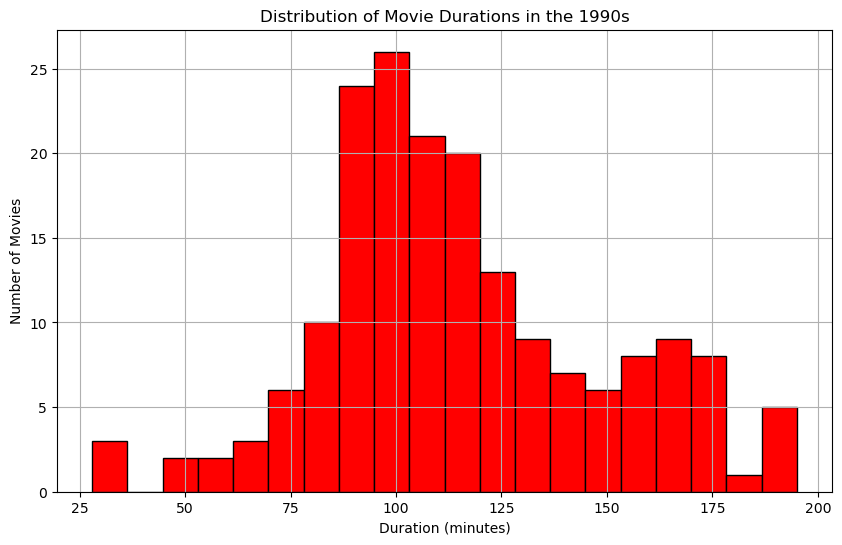

In [29]:
# Plotting the histogram for the duration of movies released in the 1990s
plt.figure(figsize=(10, 6))
plt.hist(movies_90['duration'], bins=20, edgecolor='black', color = 'red')
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

In [31]:
# Counting the most frequent movie duration in the 1990s
duration = 100
print('The most frequest movie duration in the 1990s was? ',duration,'mins')

The most frequest movie duration in the 1990s was?  100 mins


In [84]:
#Counting the number of number of short action movies in the 1990s
short_movie_count = movies_90[(movies_90['duration']<90) & (movies_90['genre']=='Action')].shape[0]
print('The number of short action movies released in the 1990s was? ',short_movie_count, 'movies')

The number of short action movies released in the 1990s was?  7 movies


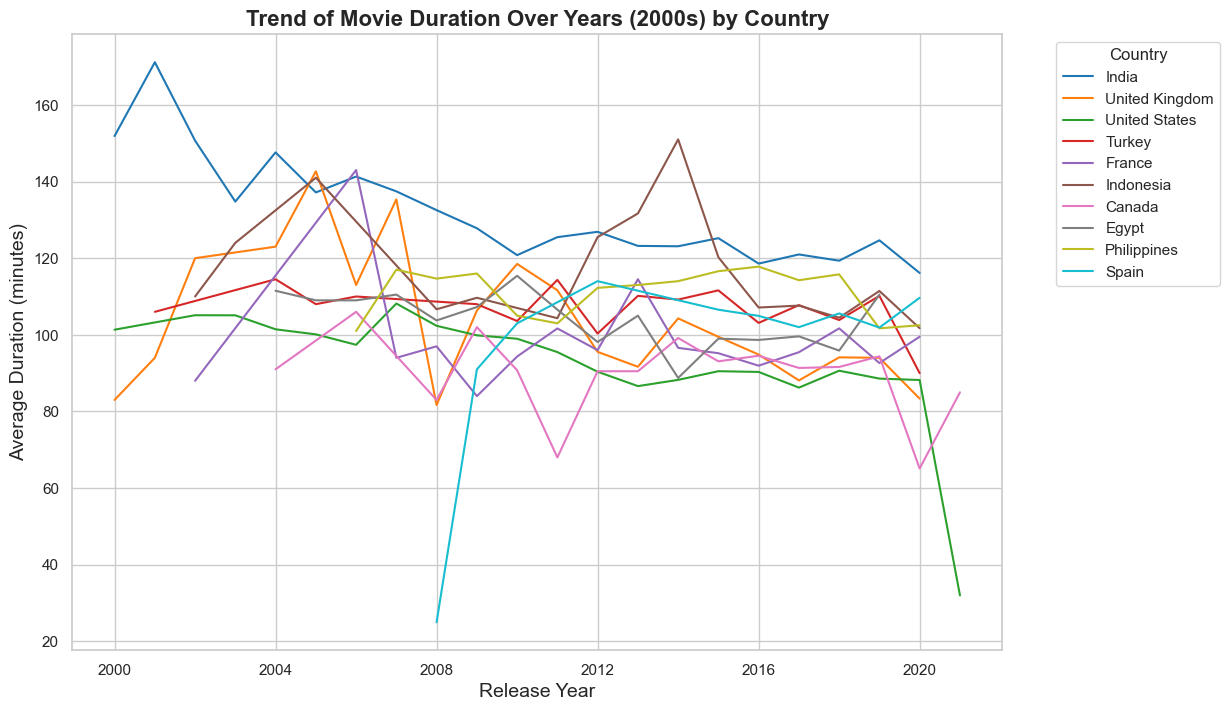

In [98]:
#Plotting the trend of movie duration over the years from 2000s onwards
movies_2000s = netflix_df[(netflix_df['release_year'].dt.year >= 2000) & (netflix_df['type'] == 'Movie')]
top_countries = movies_2000s['country'].value_counts().head(10).index
movies_2000s = movies_2000s[movies_2000s['country'].isin(top_countries)]

# Create a genre column if not present
if 'genre' not in movies_2000s.columns:
    movies_2000s['genre'] = movies_2000s['listed_in'].str.split(',').str[0]  

# Group data for trends
yearly_duration = movies_2000s.groupby(['release_year', 'country'])['duration'].mean().reset_index()
yearly_genre_duration = movies_2000s.groupby(['release_year', 'genre'])['duration'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_duration, x='release_year', y='duration', hue='country', palette='tab10')
plt.title("Trend of Movie Duration Over Years (2000s) by Country", fontsize=16, weight='bold')
plt.xlabel("Release Year", fontsize=14)
plt.ylabel("Average Duration (minutes)", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


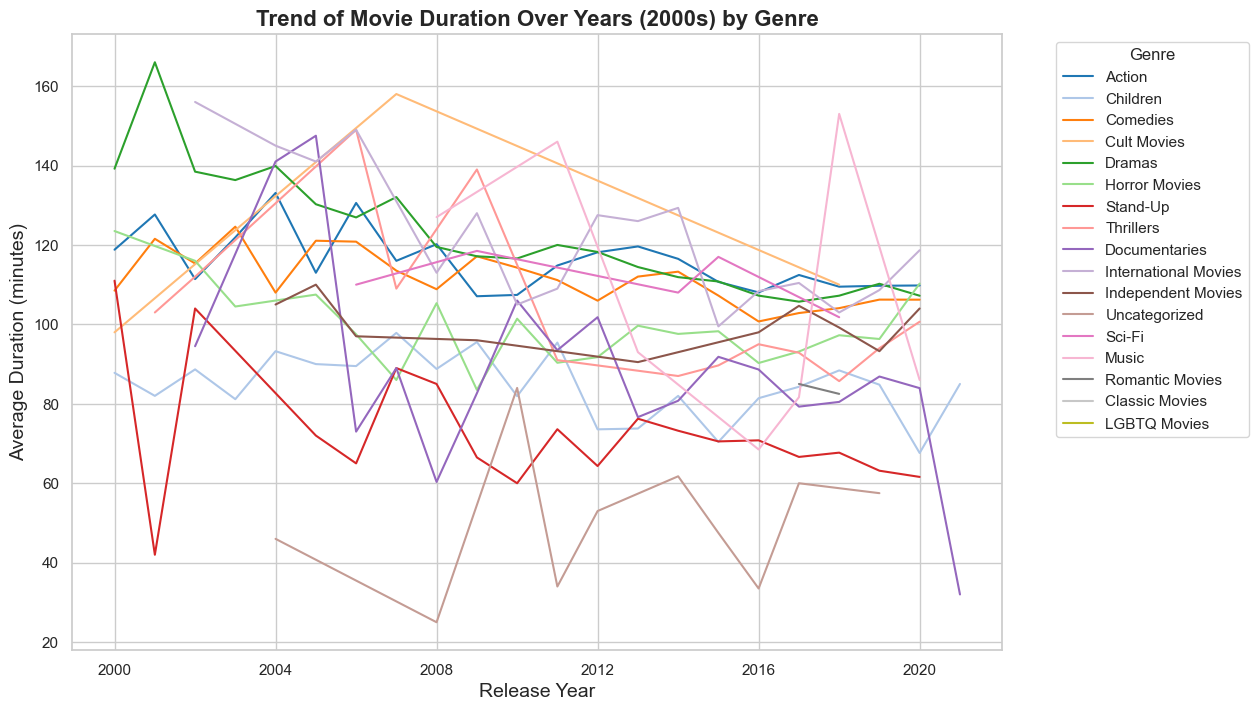

In [90]:
#Plotting duration trends over time for different genres
plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_genre_duration, x='release_year', y='duration', hue='genre', palette='tab20')
plt.title("Trend of Movie Duration Over Years (2000s) by Genre", fontsize=16, weight='bold')
plt.xlabel("Release Year", fontsize=14)
plt.ylabel("Average Duration (minutes)", fontsize=14)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Dramas'),
  Text(2, 0, 'Horror Movies'),
  Text(3, 0, 'Independent Movies'),
  Text(4, 0, 'Comedies'),
  Text(5, 0, 'Documentaries'),
  Text(6, 0, 'Sci-Fi'),
  Text(7, 0, 'Children'),
  Text(8, 0, 'Uncategorized'),
  Text(9, 0, 'Thrillers'),
  Text(10, 0, 'Stand-Up'),
  Text(11, 0, 'International Movies'),
  Text(12, 0, 'Music'),
  Text(13, 0, 'Cult Movies'),
  Text(14, 0, 'Romantic Movies'),
  Text(15, 0, 'Classic Movies'),
  Text(16, 0, 'LGBTQ Movies')])

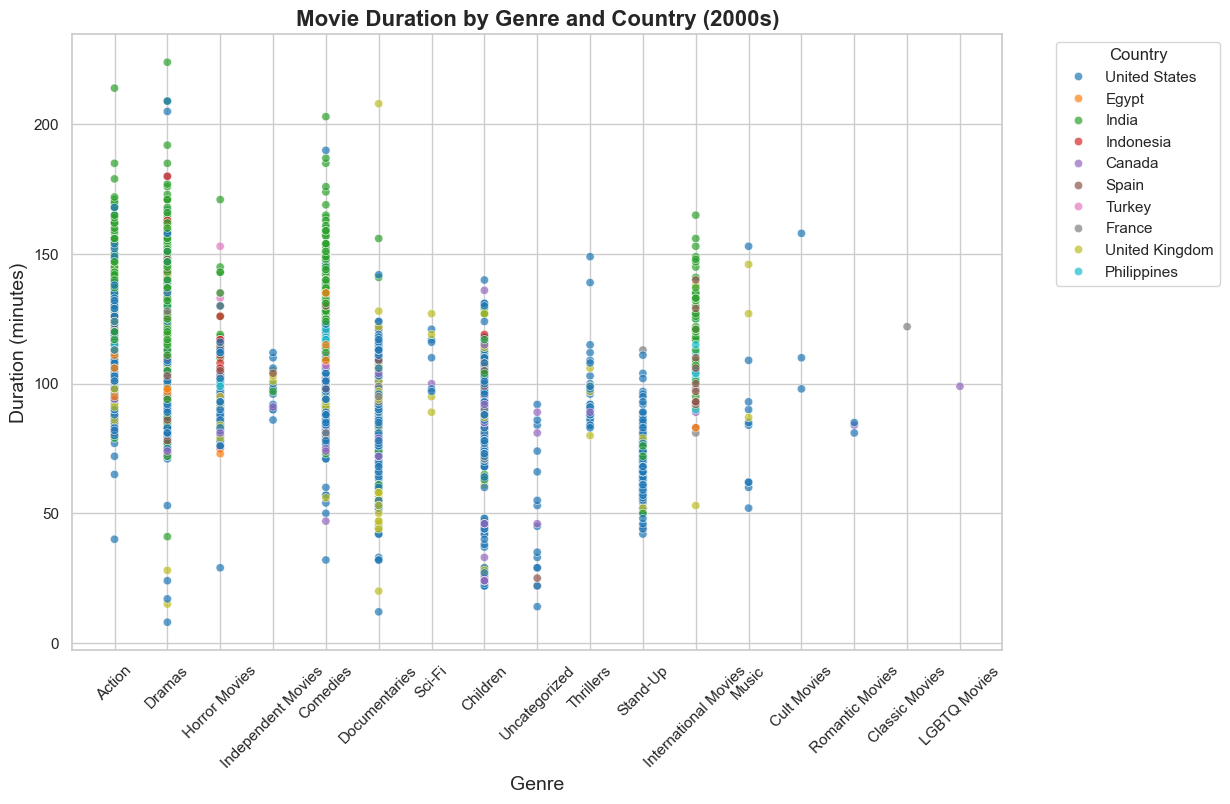

In [96]:
#Platting movie duration by genre and country
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=movies_2000s,
    x='genre',
    y='duration',
    hue='country',
    palette='tab10',
    alpha=0.7,
)
plt.title("Movie Duration by Genre and Country (2000s)", fontsize=16, weight='bold')
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Duration (minutes)", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)